In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import joblib
from sklearn.model_selection import  GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from imblearn.over_sampling import SMOTE

In [2]:
# 1. Load the dataset
df = pd.read_csv("heart_failure_clinical_records_dataset (1).csv")

In [3]:
df.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


In [4]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 13 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   age                       299 non-null    float64
 1   anaemia                   299 non-null    int64  
 2   creatinine_phosphokinase  299 non-null    int64  
 3   diabetes                  299 non-null    int64  
 4   ejection_fraction         299 non-null    int64  
 5   high_blood_pressure       299 non-null    int64  
 6   platelets                 299 non-null    float64
 7   serum_creatinine          299 non-null    float64
 8   serum_sodium              299 non-null    int64  
 9   sex                       299 non-null    int64  
 10  smoking                   299 non-null    int64  
 11  time                      299 non-null    int64  
 12  DEATH_EVENT               299 non-null    int64  
dtypes: float64(3), int64(10)
memory usage: 30.5 KB


In [6]:
# 2. Split data into features and target
X = df.drop("DEATH_EVENT", axis=1)
y = df["DEATH_EVENT"]

In [7]:
# Balance data if needed
smote = SMOTE(random_state=42)
X, y = smote.fit_resample(X, y)

In [8]:
# 3. Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [9]:
# 4. Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

In [10]:
# Try multiple models
models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(n_estimators=200),
    "SVM": SVC(probability=True),
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='logloss')
}
best_model = None
best_score = 0

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {score:.4f}")
    if score > best_score:
        best_score = score
        best_model = model

Logistic Regression Accuracy: 0.8659
Random Forest Accuracy: 0.8902
SVM Accuracy: 0.8415


C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:32:29] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


XGBoost Accuracy: 0.8537


In [11]:
# Final evaluation
y_pred_final = best_model.predict(X_test)
print("\nBest Model:", type(best_model).__name__)
print("Accuracy:", accuracy_score(y_test, y_pred_final))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_final))
print("Classification Report:\n", classification_report(y_test, y_pred_final))


Best Model: RandomForestClassifier
Accuracy: 0.8902439024390244
Confusion Matrix:
 [[35  6]
 [ 3 38]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.85      0.89        41
           1       0.86      0.93      0.89        41

    accuracy                           0.89        82
   macro avg       0.89      0.89      0.89        82
weighted avg       0.89      0.89      0.89        82



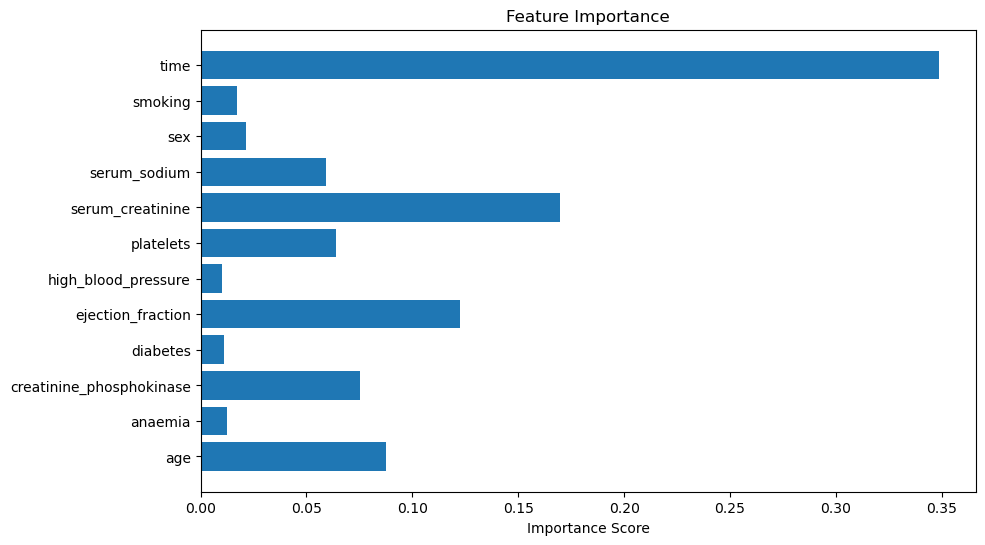

In [12]:
import matplotlib.pyplot as plt

importances = best_model.feature_importances_
features = X.columns

plt.figure(figsize=(10,6))
plt.barh(features, importances)
plt.xlabel("Importance Score")
plt.title("Feature Importance")
plt.show()

In [13]:
# Save best model and scaler
joblib.dump(best_model, "best_heart_failure_model.pkl")
joblib.dump(scaler, "scaler.pkl")

['scaler.pkl']